# US Accidents (2016-2021) Exploratory Data Analysis
## by Emefiele-Konyeri Awinrin

## Table Of Content

## Introduction
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

### Gathering Data

In [2]:
# loading the dataset
accidents = pd.read_csv('US_Accidents_Dec21_updated.csv')

### Assessing Data

In [5]:
# Lets see the size of our data
accidents.shape

(2845342, 47)

> We have over 2.8 million accidents data and 47 features of the accident.

In [4]:
# loading the us accidents data for visual assessment
accidents.head(5).T

,0,1,2,3,4
ID,A-1,A-2,A-3,A-4,A-5
Severity,3,2,2,2,3
Start_Time,2016-02-08 00:37:08,2016-02-08 05:56:20,2016-02-08 06:15:39,2016-02-08 06:51:45,2016-02-08 07:53:43
End_Time,2016-02-08 06:37:08,2016-02-08 11:56:20,2016-02-08 12:15:39,2016-02-08 12:51:45,2016-02-08 13:53:43
Start_Lat,40.10891,39.86542,39.10266,41.06213,39.172393
Start_Lng,-83.09286,-84.0628,-84.52468,-81.53784,-84.492792
End_Lat,40.11206,39.86501,39.10209,41.06217,39.170476
End_Lng,-83.03187,-84.04873,-84.52396,-81.53547,-84.501798
Distance(mi),3.23,0.747,0.055,0.123,0.5
Description,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,At OH-4/OH-235/Exit 41 - Accident.,At I-71/US-50/Exit 1 - Accident.,At Dart Ave/Exit 21 - Accident.,At Mitchell Ave/Exit 6 - Accident.


In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

> Some of features data type should be datetime: `Start_Time`, `End_Time`, and `Weather_Timestamp`

In [7]:
# lets check for duplicated data
accidents.duplicated().sum()

0

In [15]:
# lets check for missing data and their percentages
perc_missing = (accidents.isnull().sum().sort_values(ascending=False)/len(accidents))*100
perc_missing

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

> The `Number` column has more half its data missing, that might lead to it being dropped and there other features too that would be dropped if they aren't of interest to this analysis

In [9]:
# lets check for the summary statistics
accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


> From the summary statisitcs the max degree of severity is 4 and a minimum of 1, the max distance affected by accident was 155.2 miles which appears to be an outlier with the statistics showing distances to be less 1 mile, the max temperature of the accidents was 196 Fahrenheit and a minimum of -86 Fahrenheit.

In [12]:
# lets check how many numeric features are in the dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = accidents.select_dtypes(include=numerics)
len(numeric_columns.columns)

14

### Quality Issue
Erroneous Datatypes: `Start_Time`, `End_Time`, and `Weather_Timestamp`

### Tidiness Issue
The dataset appears to be tidy, that makes the dataset ready for exploration. 

### Cleaning Data

In [3]:
# Making a copy of original piece of data
accidents_clean = accidents.copy()

#### Define: 
1. Erroneous data types: `Start_Time`, `End_Time`, and `Weather_Timestamp`

#### Code

In [4]:
# changing strings to datetime and int to strings
accidents_clean['Start_Time'] = pd.to_datetime(accidents_clean['Start_Time'])
accidents_clean['End_Time'] = pd.to_datetime(accidents_clean['End_Time'])
accidents_clean['Weather_Timestamp'] = pd.to_datetime(accidents_clean['Weather_Timestamp'])

#### Test

In [18]:
accidents_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

<a id='analyzing_and_visualizing'></a>
## Analyzing and Visualizing Data

In [19]:
# let's load data for visual assessment
accidents_clean.sample(6).T

,2703551,1261382,485984,213988,214720,1482049
ID,A-2703552,A-1261383,A-485985,A-213989,A-214721,A-1482050
Severity,2,2,2,3,2,2
Start_Time,2018-01-15 17:49:08,2021-05-23 23:12:18,2021-10-22 20:31:06,2017-06-29 14:37:54,2017-07-06 19:21:59,2021-10-23 17:27:00
End_Time,2018-01-15 23:49:08,2021-05-24 00:27:18,2021-10-22 21:49:26,2017-06-29 20:37:54,2017-07-07 01:21:59,2021-10-23 19:35:26
Start_Lat,39.64711,29.828104,26.713547,34.19755,37.824409,36.98778
Start_Lng,-75.74231,-95.482192,-81.902883,-118.40257,-122.316221,-122.022324
End_Lat,39.64707,29.828062,26.712738,34.20125,37.824409,36.98864
End_Lng,-75.75148,-95.485115,-81.904459,-118.40287,-122.316221,-122.014984
Distance(mi),0.488,0.175,0.112,0.256,0.0,0.409
Description,At SR-896/Exit 1 - Accident. Right lane blocked.,Incident on GRANITE ST near LUMBERDALE RD Driv...,Incident on WESTBERRY CT near N TAMIAMI TRL Dr...,Ramp to CA-170/Hollywood Fwy - Accident.,At Bay Bridge Toll Plz - Accident.,Accident on CA-17 (CA-1) from Emeline Ave (CA-...


### The main features of interest in this dataset

The features that interest me in this dataset are:
    
* The Severity of the accident
    
* The Start time of the accident
    
* The length of the road (`Distance(mi)`) extent affected by the accident.
    
* The City and State of the accident
    
* The distances covered in each rides

* Temperature of the environment

* Precipitation(in) of the environment

* Presence of speed bump or hump in a nearby location.

* Presence of crossing in a nearby location.

* Presence of junction in a nearby location.

* Presence of traffic_signal in a nearby location.

* Period of day (i.e. day or night) based on sunrise/sunset.

* Relative side of the street

* Weather condition (rain, snow, thunderstorm, fog, etc.)

<a id='univariate'></a>
## Univariate Exploration

### Time Analysis

In [5]:
# let's get the start time in terms of day,hour and date
start_year = accidents_clean['Start_Time'].dt.strftime('%Y') # extracting year from date
start_hour = accidents_clean['Start_Time'].dt.strftime('%H') # extracting hour from date
start_day = accidents_clean['Start_Time'].dt.strftime('%A') # extracting day from date
start_month = accidents_clean['Start_Time'].dt.strftime('%b') # extracting month from date

#### Plot to explore the hour of the day with most accidents cases

In [34]:
data = pd.DataFrame(start_hour.sort_values())
data['ID'] = 1
hour = data[['Start_Time','ID']].groupby('Start_Time').count().reset_index()
hour['cases'] = ((hour['ID']/len(accidents_clean['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
hour

,Start_Time,ID,cases
0,00,68800,2.42%
1,01,59370,2.09%
2,02,55443,1.95%
3,03,48656,1.71%
4,04,51805,1.82%
5,05,80303,2.82%
6,06,111160,3.91%
7,07,135191,4.75%
8,08,130879,4.60%
9,09,108779,3.82%


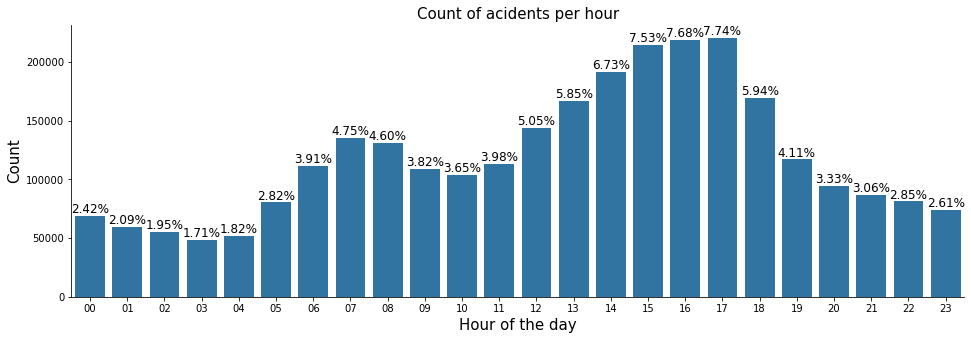

In [36]:
fig, ax = plt.subplots(figsize=(16,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot = sb.barplot(data = hour,x='Start_Time',y='ID',color=sb.color_palette()[0])
plt.bar_label(splot.containers[0],labels=hour['cases'],fontsize=12);
plt.xlabel('Hour of the day',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Count of acidents per hour',fontsize=15);

> This distribution is bimodal, which means accidents cases peaks at two periods of the day: 5am to 9am and 12pm to 6pm. 5pm had about 7.74% (220,358) of the total cases in a day, followed by 4pm with about 7.68% (218,385) of the total cases in a day

#### Plot to explore the day of the week with the most accidents cases

In [41]:
data = pd.DataFrame(start_day)
data['ID'] = 1
day = data[['Start_Time','ID']].groupby('Start_Time').count().sort_values('Start_Time').reset_index()
day['cases'] = ((day['ID']/len(accidents_clean['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
day

,Start_Time,ID,cases
0,Friday,492074,17.29%
1,Monday,419821,14.75%
2,Saturday,311691,10.95%
3,Sunday,259274,9.11%
4,Thursday,463477,16.29%
5,Tuesday,443968,15.60%
6,Wednesday,455037,15.99%


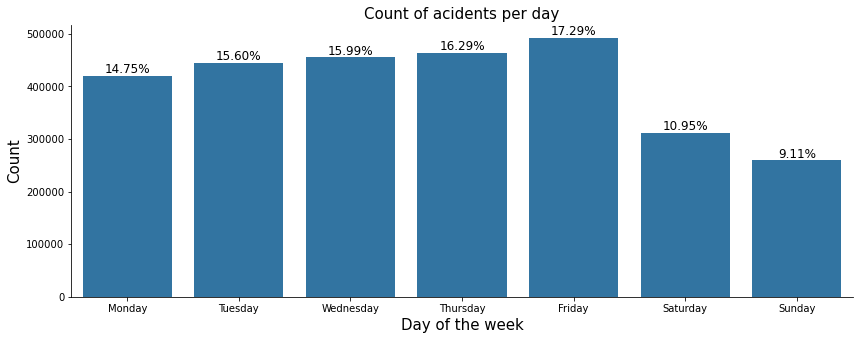

In [44]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)# removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot = sb.barplot(data = day,x='Start_Time',y='ID',color=sb.color_palette()[0],order=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
plt.bar_label(splot.containers[0],labels=['14.75%','15.60%','15.99%','16.29%','17.29%','10.95%','9.11%',],fontsize=12);
plt.xlabel('Day of the week',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Count of acidents per day',fontsize=15);

> This distribution is unimodal, accident cases peaks on fridays, and there are more accident cases on weekdays compared to weekends. Friday had about 17.29% (492,074) of total cases in a week, followed by Thursday with about  16.29% (463,477) of total cases in a week

#### Plot to explore the developments in accident cases across months in a year

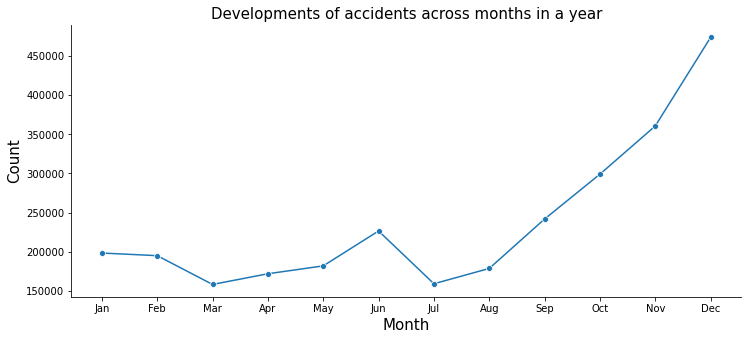

In [90]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # months of the year
data = pd.DataFrame({'Month':start_month,'ID':accidents_clean['ID']}) # dataframe for months of the year
data['Month'] = data['Month'].astype(CategoricalDtype(categories=months, ordered=True))
data = data.groupby('Month').count().reset_index()
fig, ax = plt.subplots(figsize=(12,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
plt.title('Relationship between Month and number of Tweets')
sb.lineplot(data=data,x='Month',y='ID',color=sb.color_palette()[0],marker='o')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Developments of accidents across months in a year',fontsize=15);

> There is sporadic developments in accident cases from first quarter to third quarter of the year, accident cases begins to 
rise at a high number from third quarter to fourth quarter of the year.

#### Plot to explore the developments in accident cases over the years

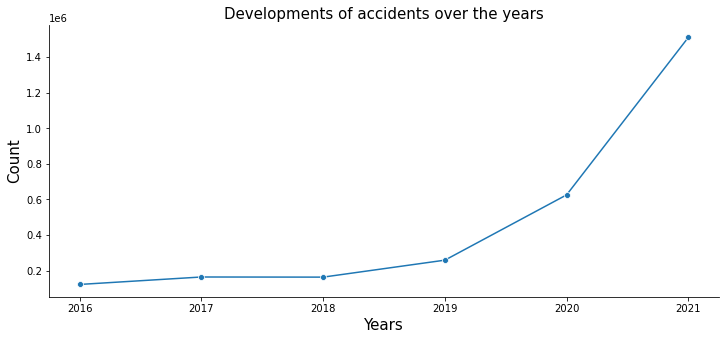

In [91]:
# let's create a bar chart to display the Distribution of Appointmentdate and No-Show rate
data = pd.DataFrame({'Year':start_year,'ID':accidents_clean['ID']}) # dataframe for years
data = data.groupby('Year').count().reset_index()
fig, ax = plt.subplots(figsize=(12,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
sb.lineplot(data=data,x='Year',y='ID',color=sb.color_palette()[0],marker='o')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Count (in Million)',fontsize=15)
plt.title('Developments of accidents over the years',fontsize=15);

> Accident cases have increased steadily over the years which has cauesed alot concerns.

### Region Analysis

#### Plot to explore the cities in the United States of America

In [18]:
City = accidents_clean[['City','ID']].groupby('City').count().sort_values(by='ID', ascending=False).reset_index()[:10]
City['cases'] = ((City['ID']/len(accidents_clean['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
City

,City,ID,cases
0,Miami,106966,3.76%
1,Los Angeles,68956,2.42%
2,Orlando,54691,1.92%
3,Dallas,41979,1.48%
4,Houston,39448,1.39%
5,Charlotte,33152,1.17%
6,Sacramento,32559,1.14%
7,San Diego,26627,0.94%
8,Raleigh,22840,0.80%
9,Minneapolis,22768,0.80%


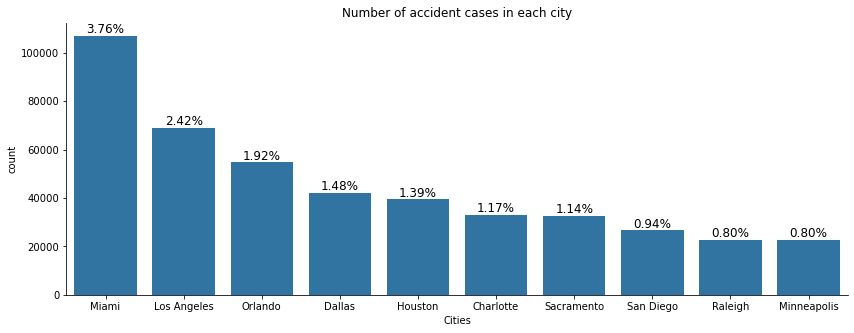

In [20]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot = sb.barplot(data = City,y='ID',x='City',color=sb.color_palette()[0])
plt.bar_label(splot.containers[0],labels=City['cases'],fontsize=12);
plt.xlabel('Cities',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Number of accident cases in each city',fontsize=15);

> Miami has the most number of accident cases and about 3.76% (106,966) of the total cases, followed by Los Angeles with about 2.42% (68,956) of the total cases

In [22]:
miami = accidents_clean[['City','ID']].groupby('City').count().sort_values(by='ID', ascending=False).reset_index()[:1]
miami['yearly'] = round(miami['ID']/6)
miami['daily'] = round(miami['ID']/(6*365))
miami

,City,ID,yearly,daily
0,Miami,106966,17828.0,49.0


> Miami averaged 17,828 accident cases yearly and 49 accident cases daily.

#### Plot to explore the states in the United States of America

In [24]:
State = accidents_clean[['State','ID']].groupby('State').count().sort_values(by='ID', ascending=False).reset_index()[:10]
State['cases'] = ((State['ID']/len(accidents_clean['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
State

,State,ID,cases
0,CA,795868,27.97%
1,FL,401388,14.11%
2,TX,149037,5.24%
3,OR,126341,4.44%
4,VA,113535,3.99%
5,NY,108049,3.80%
6,PA,99975,3.51%
7,MN,97185,3.42%
8,NC,91362,3.21%
9,SC,89216,3.14%


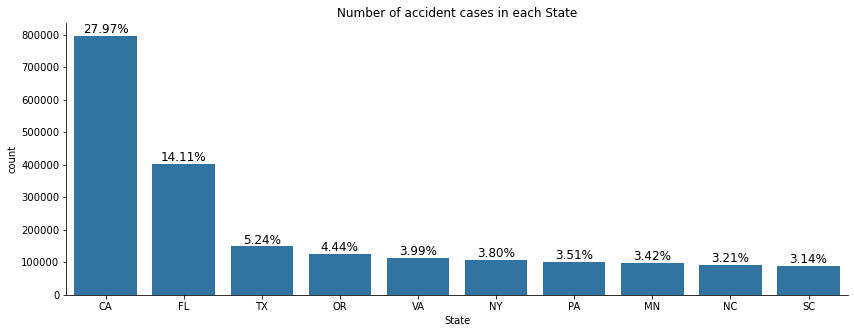

In [26]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot = sb.barplot(data = State,y='ID',x='State',color=sb.color_palette()[0])
plt.bar_label(splot.containers[0],labels=State['cases'],fontsize=12);
plt.xlabel('State',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Number of accident cases in each State',fontsize=15);

> California has the most number of accident cases and about 27.97% (795,868) of the total cases, followed by Florida with about 14.11% (401388) of the total cases

#### Plot to explore the cities in California

In [28]:
state_cities = accidents_clean[['State','City','ID']].groupby(['State','City']).count().sort_values(by='State', ascending=False).reset_index()
CA_cities = state_cities[state_cities['State'] == 'CA'].sort_values(by='ID', ascending=False)
CA_cities['cases'] = ((CA_cities['ID']/sum(CA_cities['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
CA_cities = CA_cities[:10]
CA_cities

,State,City,ID,cases
15052,CA,Los Angeles,68956,8.66%
15555,CA,Sacramento,32559,4.09%
15530,CA,San Diego,26627,3.35%
15539,CA,San Jose,13376,1.68%
15950,CA,Riverside,12861,1.62%
15266,CA,Bakersfield,12044,1.51%
15526,CA,San Bernardino,11249,1.41%
15231,CA,Anaheim,10502,1.32%
16000,CA,Ontario,9719,1.22%
15800,CA,Oakland,9255,1.16%


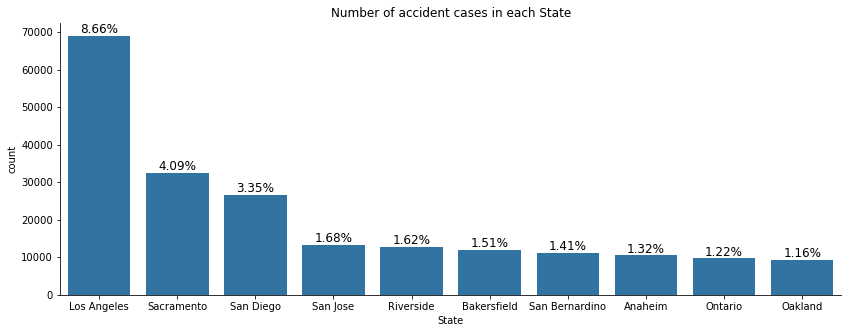

In [30]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot = sb.barplot(data = CA_cities,y='ID',x='City',color=sb.color_palette()[0])
plt.bar_label(splot.containers[0],labels=CA_cities['cases'],fontsize=12);
plt.xlabel('California',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Number of accident cases in each State',fontsize=15);

> Los Angeles has the most number of accident cases in california and about 8.66% (68,956) of the total cases in california, followed by Sacramento with about 4.09% (32,559) of the total cases in california

#### Plot to explore the timezones in the United States of America

In [7]:
Timezone = accidents_clean[['Timezone','ID']].groupby('Timezone').count().sort_values(by='ID', ascending=False).reset_index()
Timezone['cases'] = ((Timezone['ID']/len(accidents_clean['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
Timezone

,Timezone,ID,cases
0,US/Eastern,1221927,42.94%
1,US/Pacific,967094,33.99%
2,US/Central,488065,17.15%
3,US/Mountain,164597,5.78%


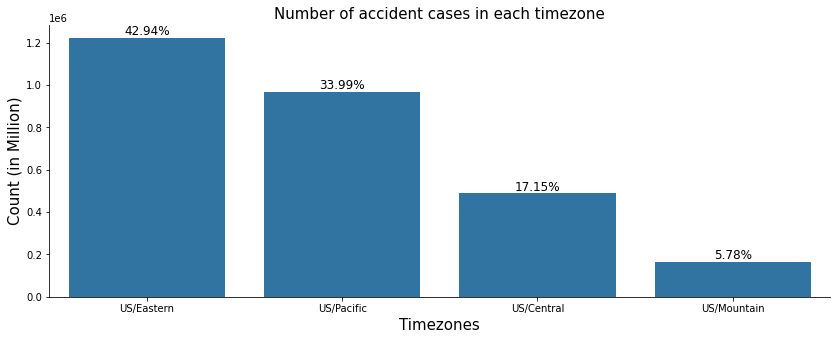

In [10]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot = sb.barplot(data = Timezone,y='ID',x='Timezone',color=sb.color_palette()[0])
plt.bar_label(splot.containers[0],labels=Timezone['cases'],fontsize=12);
plt.xlabel('Timezones',fontsize=15)
plt.ylabel('Count (in Million)',fontsize=15)
plt.title('Number of accident cases in each timezone',fontsize=15);

#### Plot to explore the eastern and pacific timezones in the United States of America

In [58]:
timezone_cities = accidents_clean[['Timezone','City','ID']].groupby(['Timezone','City']).count().sort_values(by='Timezone', ascending=False).reset_index()
Eastern_Pacific_cities = timezone_cities[(timezone_cities['Timezone'] == 'US/Eastern') | (timezone_cities['Timezone'] == 'US/Pacific')].sort_values(by='ID', ascending=False)
Eastern_Pacific_cities['cases'] = ((Eastern_Pacific_cities['ID']/sum(Eastern_Pacific_cities['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
Eastern_Pacific_cities['color'] = ['b' if i == 'US/Eastern' else 'r' for i in Eastern_Pacific_cities['Timezone']]
Eastern_Pacific_cities = Eastern_Pacific_cities[:10]
Eastern_Pacific_cities

,Timezone,City,ID,cases,color
4815,US/Eastern,Miami,106903,4.88%,b
313,US/Pacific,Los Angeles,68956,3.15%,r
4138,US/Eastern,Orlando,54690,2.50%,b
7007,US/Eastern,Charlotte,33141,1.51%,b
1123,US/Pacific,Sacramento,32559,1.49%,r
1085,US/Pacific,San Diego,26627,1.22%,r
6383,US/Eastern,Raleigh,22837,1.04%,b
1731,US/Pacific,Portland,20563,0.94%,r
7627,US/Eastern,Atlanta,15619,0.71%,b
4467,US/Eastern,Jacksonville,14519,0.66%,b


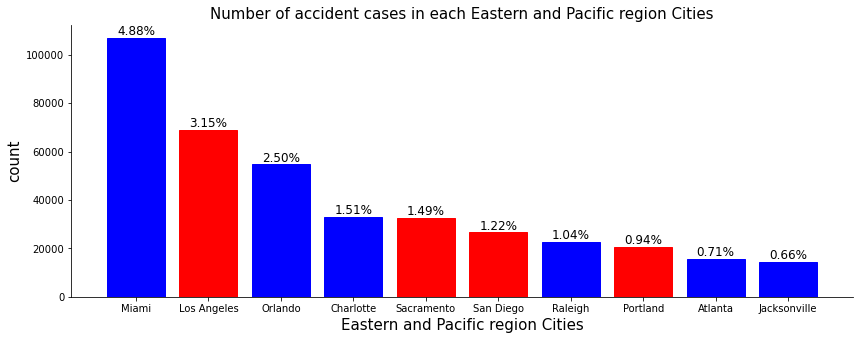

In [72]:
colors = []
for c in Eastern_Pacific_cities['Timezone']:
    if c == 'US/Eastern':
        colors.append('blue')
    else:
        colors.append('red')
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot=plt.bar(Eastern_Pacific_cities['City'],Eastern_Pacific_cities['ID'])
for i,j in enumerate(Eastern_Pacific_cities['color']):
    if j == 'b':
        splot[i].set_color('b')
    else:
        splot[i].set_color('r')
plt.bar_label(container=splot,labels=Eastern_Pacific_cities['cases'],fontsize=12)
plt.xlabel('Eastern and Pacific region Cities',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Number of accident cases in each Eastern and Pacific region Cities',fontsize=15);

### Weather Analysis

#### Plot to explore the weather conditions in relation to accidents in the United States of America

In [46]:
Weather_Condition = accidents_clean[['Weather_Condition','ID']].groupby(['Weather_Condition']).count().sort_values(by='ID', ascending=False).reset_index()
Weather_Condition['cases'] = ((Weather_Condition['ID']/len(accidents_clean['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
Weather_Condition = Weather_Condition[:10]
Weather_Condition

,Weather_Condition,ID,cases
0,Fair,1107194,38.91%
1,Mostly Cloudy,363959,12.79%
2,Cloudy,348767,12.26%
3,Partly Cloudy,249939,8.78%
4,Clear,173823,6.11%
5,Light Rain,128403,4.51%
6,Overcast,84882,2.98%
7,Scattered Clouds,45132,1.59%
8,Light Snow,43752,1.54%
9,Fog,41226,1.45%


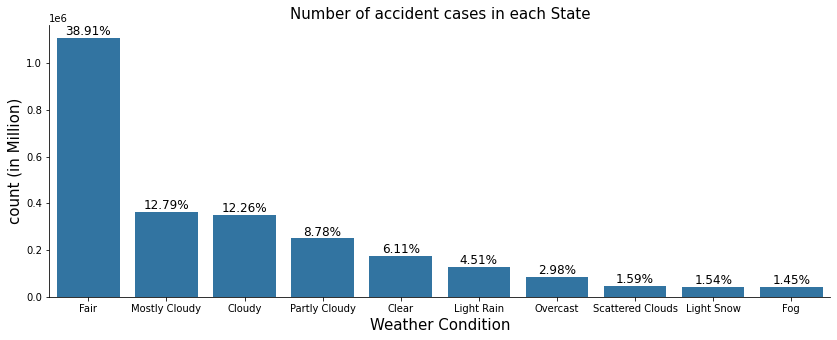

In [48]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot = sb.barplot(data = Weather_Condition,y='ID',x='Weather_Condition',color=sb.color_palette()[0])
plt.bar_label(splot.containers[0],labels=Weather_Condition['cases'],fontsize=12);
plt.xlabel('Weather Condition',fontsize=15)
plt.ylabel('count (in Million)',fontsize=15)
plt.title('Number of accident cases in each State',fontsize=15);

> About 38.91% (1,107,194) accident cases were Fair, followed by weather conditions that was Mostly Cloudy with 12.79% (363,959). In the top ten weather conditions with most accidents, about 33.83% of accident cases occurred during cloudy weather conditions

In [71]:
accidents_clean.sample(6).T

,2353487,1000312,2653666,1616487,566754,1147577
ID,A-2353488,A-1000313,A-2653667,A-1616488,A-566755,A-1147578
Severity,2,2,2,2,2,2
Start_Time,2020-02-25 16:40:00,2021-04-17 14:54:00,2018-05-10 13:20:50,2021-01-21 04:44:04,2021-07-17 20:58:41,2021-06-09 17:19:00
End_Time,2020-02-25 17:51:32,2021-04-17 17:47:00,2018-05-10 19:20:50,2021-01-21 06:44:18,2021-07-17 22:16:16,2021-06-09 18:37:00
Start_Lat,34.067583,39.774711,33.462573,25.846021,34.027869,36.734553
Start_Lng,-117.566678,-86.142288,-112.062964,-80.239695,-78.801178,-119.777453
End_Lat,34.067583,39.777486,33.462573,25.846165,34.026183,36.754495
End_Lng,-117.566678,-86.141147,-112.062964,-80.239702,-78.799905,-119.775709
Distance(mi),0.0,0.201,0.0,0.01,0.137,1.381
Description,At Haven Ave/Exit 56 - Accident.,Stationary traffic on I-65 N from exit [112A] ...,At 7th St/Exit 145 - Accident.,Incident on NW 25TH AVE near NW 79TH ST Drive ...,Incident on SC-9 near SPRINGFIELD CHURCH RD Ex...,Stationary traffic on CA-41 N from O St (CA-41...


#### Plot to explore the temperaure of the atmosphere with relation to accidents in the United States of America

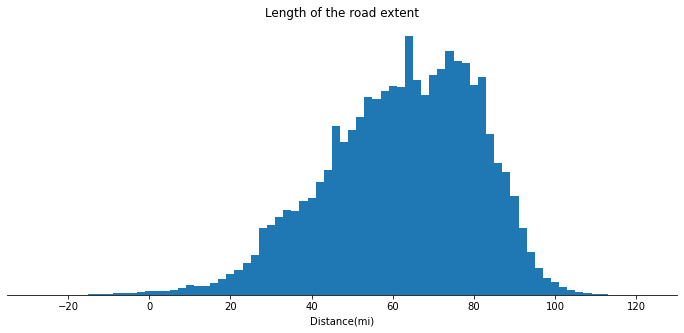

In [50]:
Temperature = accidents_clean[~(accidents_clean['Temperature(F)'].isnull())]
bins = np.arange(Temperature['Temperature(F)'].min()-2,Temperature['Temperature(F)'].max()+2,2)
fig, ax = plt.subplots(figsize=(12,5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.hist(data = Temperature,x='Temperature(F)',bins=bins)
plt.xlim(-35,130)
plt.xlabel('Temperature(F)',fontsize=15)
plt.title('Temperature of the atmosphere',fontsize=15);

> This is a normal distribution which has most accident cases from 20 Fahrenheit to 100 Fahrenheit. The number of accident cases peaks at a region from 60 Fahrenheit to 80 Fahrenheit.

#### Plot to explore the precipitation in the atmosphere with relation to accidents in the United States of America

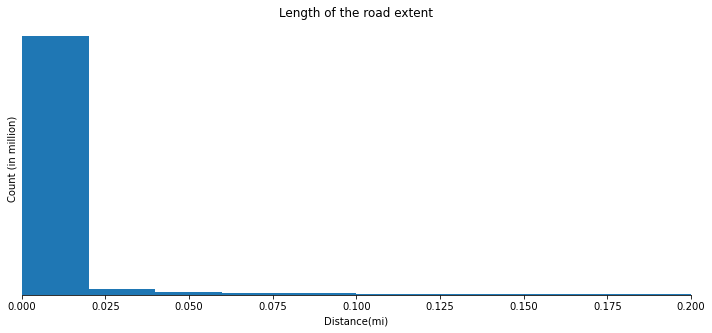

In [61]:
Precipitation = accidents_clean[~(accidents_clean['Precipitation(in)'].isnull())]
bins = np.arange(0,Precipitation['Precipitation(in)'].max()+0.02,0.02)
fig, ax = plt.subplots(figsize=(12,5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.hist(data = Precipitation,x='Precipitation(in)',bins = bins)
plt.xlim(0,0.2)
plt.xlabel('Precipitation(in)',fontsize=15)
plt.title('Precipitation in the atmosphere',fontsize=15);

In [ ]:
This is a positively skewed distribution with most accident cases occurring  during a precipitation less than 0.025in. 

#### Plot to explore the wind speed of the atmosphere with relation to accidents in the United States of America

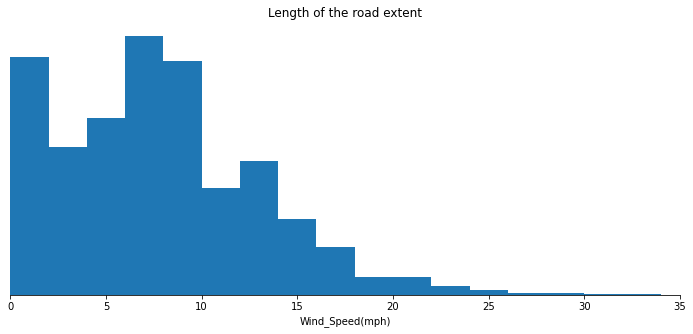

In [66]:
Wind_Speed = accidents_clean[~(accidents_clean['Wind_Speed(mph)'].isnull())]
bins = np.arange(0,Wind_Speed['Wind_Speed(mph)'].max()+2,2)
fig, ax = plt.subplots(figsize=(12,5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.hist(data = Wind_Speed,x='Wind_Speed(mph)',bins = bins)
plt.xlim(0,35)
plt.xlabel('Wind_Speed(mph)',fontsize=15)
plt.title('Wind_Speed of the atmosphere',fontsize=15);

In [ ]:
This is a random distribution with most accident cases occurring at a wind speed less than 20mph.

### Road Analysis

#### Plot to explore the Crossing on the road with relation to accidents in the United States of America

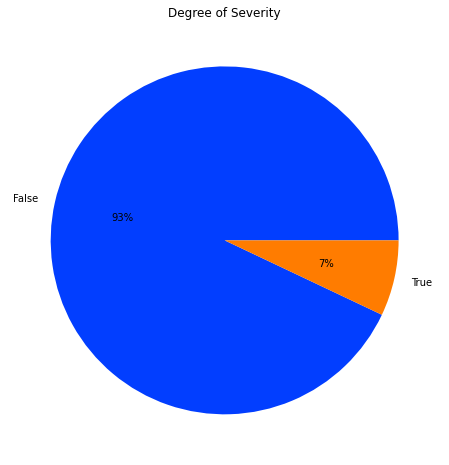

In [6]:
data = accidents_clean['Crossing'].value_counts()
value = list(data.values)
Crossing = list(data.index)
plt.figure(figsize=(16,8))
plt.pie(data =data,x=value,labels=Crossing,colors=sb.color_palette('bright'), autopct='%.0f%%',textprops={'size': 'x-large'})
plt.title('Crossing on the road',fontsize=17);

In [ ]:
> There was crossing on the road in about 7% of accident cases and in about 93% there was not.

#### Plot to explore the Junctions on the road with relation to accidents in the United States of America

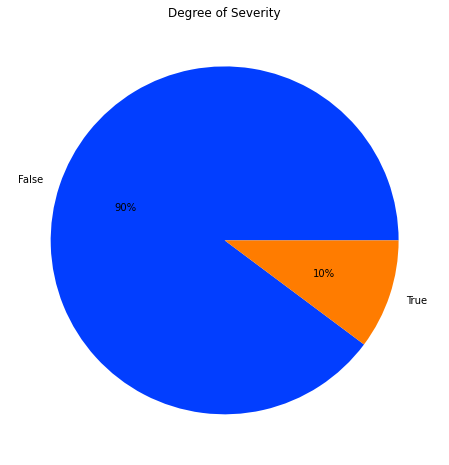

In [7]:
data = accidents_clean['Junction'].value_counts()
value = list(data.values)
Junction = list(data.index)
plt.figure(figsize=(16,8))
plt.pie(data =data,x=value,labels=Junction,colors=sb.color_palette('bright'), autopct='%.0f%%',textprops={'size': 'x-large'})
plt.title('Junction on the road',fontsize=17);

In [ ]:
> There was a Junction on the road in about 10% of accident cases and in about 90% there was not.

#### Plot to explore the Traffic Signal on the road with relation to accidents in the United States of America

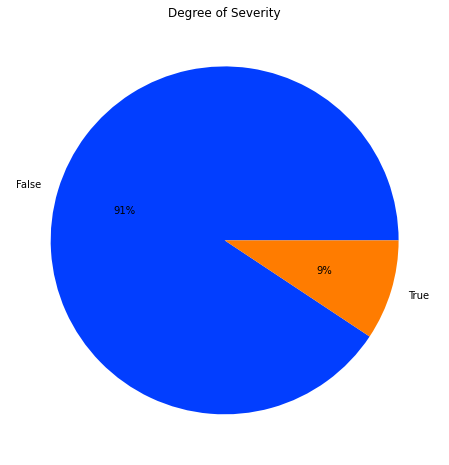

In [8]:
data = accidents_clean['Traffic_Signal'].value_counts()
value = list(data.values)
Traffic_Signal = list(data.index)
plt.figure(figsize=(16,8))
plt.pie(data =data,x=value,labels=Traffic_Signal,colors=sb.color_palette('bright'), autopct='%.0f%%',textprops={'size': 'x-large'})
plt.title('Traffic_Signal on the road',fontsize=17);

> There was traffic signal on the road in about 9% of accident cases and in about 91% there was not.

#### Plot to explore the Sunrise and Sunset with relation to accidents in the United States of America

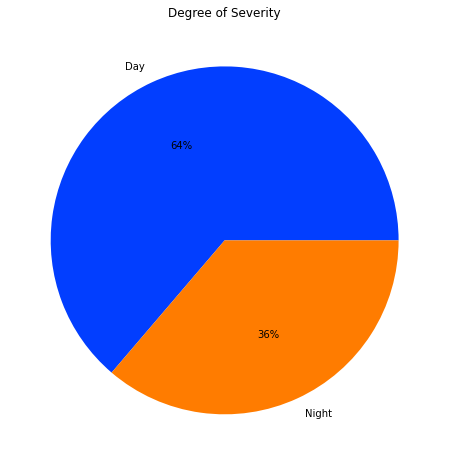

In [9]:
data = accidents_clean['Sunrise_Sunset'].value_counts()
value = list(data.values)
Sunrise_Sunset = list(data.index)
plt.figure(figsize=(16,8))
plt.pie(data =data,x=value,labels=Sunrise_Sunset,colors=sb.color_palette('bright'), autopct='%.0f%%',textprops={'size': 'x-large'})
plt.title('Time of the day',fontsize=17);

In [ ]:
> About 64% of accidents happen during the day and about 36% of accidents happen at night.

#### Plot to explore the Side of the road with relation to accidents in the United States of America

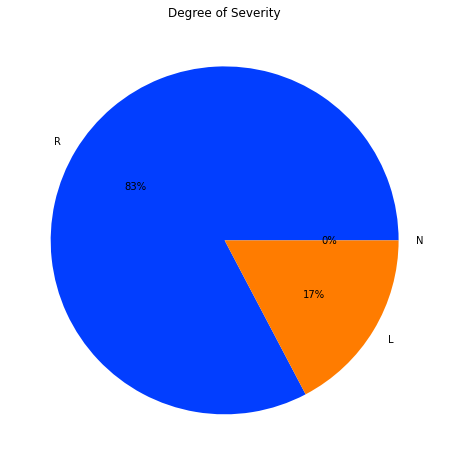

In [11]:
data = accidents_clean['Side'].value_counts()
value = list(data.values)
Side = list(data.index)
plt.figure(figsize=(16,8))
plt.pie(data =data,x=value,labels=Side,colors=sb.color_palette('bright'), autopct='%.0f%%',textprops={'size': 'x-large'})
plt.title('Side of the road',fontsize=17);

In [ ]:
> About 83% of accidents happen at the ride side of the road and about 17% of accidents happen at the left side of the road.

### Damage Analysis

#### Plot to explore the lenght of the road affected by the accident

In [7]:
accidents_clean['Distance(mi)'].value_counts()

0.000     385441
0.008       9262
0.009       8978
0.010       8737
0.007       7846
           ...  
11.026         1
11.346         1
17.175         1
18.984         1
36.350         1
Name: Distance(mi), Length: 14165, dtype: int64

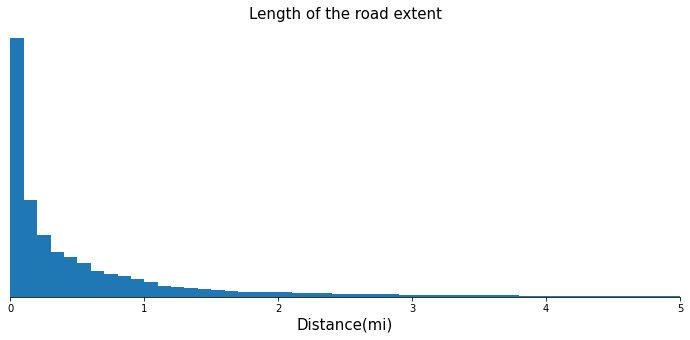

In [52]:
bins = np.arange(0,accidents_clean['Distance(mi)'].max()+0.1,0.1) # adjusting bin width
fig, ax = plt.subplots(figsize=(12,5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.hist(data = accidents_clean,x='Distance(mi)',bins=bins)
plt.xlim(0,5) # limiting the x axis to remove outliers
plt.xlabel('Distance(mi)',fontsize=15)
plt.title('Length of the road extent',fontsize=15);

In [ ]:
This is a positively skewed distribution with most accident cases affecting the road at a length less than 1 mile. 

### Severity Analysis

In [23]:
accidents_clean['Severity'].describe()

count    2.845342e+06
mean     2.137572e+00
std      4.787216e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      4.000000e+00
Name: Severity, dtype: float64

In [20]:
data = accidents_clean['Severity'].value_counts()
data

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

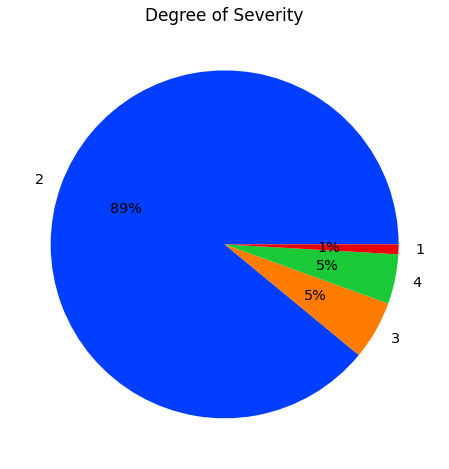

In [87]:
value = list(data.values)
severity = list(data.index)
plt.figure(figsize=(16,8))
plt.pie(data =data,x=value,labels=severity,colors=sb.color_palette('bright'), autopct='%.0f%%',textprops={'size': 'x-large'})
plt.title('Degree of Severity',fontsize=17);

> About 89% of accidents are grade 2 accidents, grade 1 accidents are just 1% of the total accidents, about 10% of accident cases had a severity greater than a grade 2 accident.

<a id='bivariate'></a>
## Bivariate Exploration

### Time-Severity Analysis

In [10]:
accidents_clean.sample(6).T

,1201662,391216,1018703,2803858,1947421,1086126
ID,A-1201663,A-391217,A-1018704,A-2803859,A-1947422,A-1086127
Severity,2,2,2,2,2,2
Start_Time,2021-12-08 16:11:30,2021-09-15 11:56:00,2021-09-08 06:36:30,2019-06-07 17:54:03,2020-11-22 08:16:00,2021-05-18 16:10:38
End_Time,2021-12-08 18:12:56,2021-09-15 18:55:00,2021-09-08 08:59:30,2019-06-07 18:23:29,2020-11-22 11:11:17,2021-05-18 17:46:39
Start_Lat,36.746663,36.961173,37.42374,36.71415,28.230744,34.234497
Start_Lng,-119.804227,-76.266789,-121.922939,-119.78426,-81.243935,-79.80537
End_Lat,36.742163,36.967025,37.420825,36.72141,28.230116,34.235098
End_Lng,-119.812626,-76.295783,-121.937912,-119.78514,-81.243763,-79.806071
Distance(mi),0.559,1.651,0.846,0.504,0.045,0.058
Description,Stationary traffic on CA-180 W from Fulton St ...,Stationary traffic on US-60 W - I-64 W from 4t...,Stationary traffic on Southbay Fwy - CA-237 W ...,At CA-99 - Accident.,Incident on HICKORY TREE RD near NOLTE RD Driv...,Incident on W LUCAS ST near HOUSE 2298 Drive w...


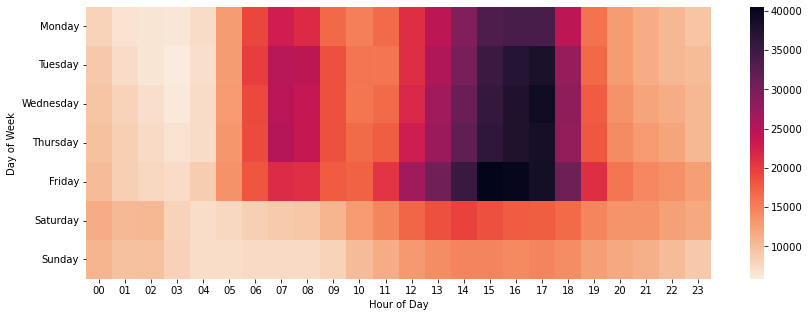

In [14]:
fig,ax1 = plt.subplots(figsize=(14,5))
data = pd.DataFrame({'Day':start_day,'Hour':start_hour,'ID':accidents_clean['ID']})
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data['Day'] = data['Day'].astype(CategoricalDtype(categories=days, ordered=True))
no_of_accidents = data.groupby(['Day', 'Hour']).size()
no_of_accidents = no_of_accidents.reset_index(name='count')
no_of_accidents = no_of_accidents.pivot(index='Day', columns='Hour', values='count')
sb.heatmap(no_of_accidents, cmap='rocket_r',ax=ax1);
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

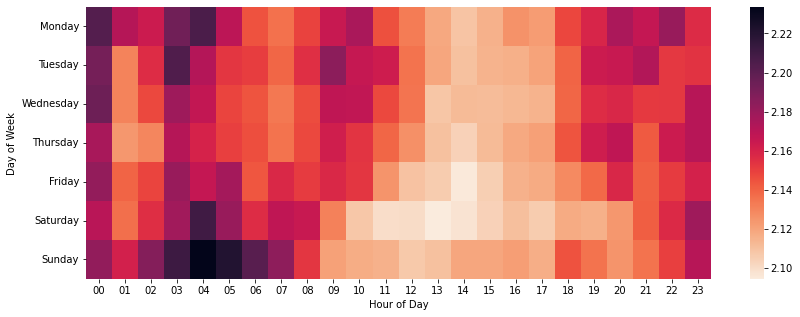

In [21]:
fig,ax1 = plt.subplots(figsize=(14,5))
data = pd.DataFrame({'Day':start_day,'Hour':start_hour,'Severity':accidents_clean['Severity']})
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data['Day'] = data['Day'].astype(CategoricalDtype(categories=days, ordered=True))
no_of_accidents = data.groupby(['Day', 'Hour']).mean()
no_of_accidents = no_of_accidents.reset_index()
no_of_accidents = no_of_accidents.pivot(index='Day', columns='Hour', values='Severity')
sb.heatmap(no_of_accidents, cmap='rocket_r',ax=ax1);
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

In [7]:
data = pd.DataFrame({'Month':start_month,'Severity':accidents_clean['Severity'],'ID':accidents_clean['ID']})
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data['Month'] = data['Month'].astype(CategoricalDtype(categories=months, ordered=True))
no_of_accidents = data.groupby(['Month', 'Severity']).size()
no_of_accidents = no_of_accidents.reset_index(name='count')
no_of_accidents = no_of_accidents.pivot(index='Month', columns='Severity', values='count')
no_of_accidents

Severity,1,2,3,4
Month,,,,
Jan,0,176483,11734,10148
Feb,156,175771,9566,9502
Mar,4092,129793,13726,10613
Apr,8116,134832,17742,11190
May,7099,143543,19677,11625
Jun,6523,185351,22468,12219
Jul,14,140572,9765,8760
Aug,42,159547,9948,9133
Sep,8,222626,8655,10533


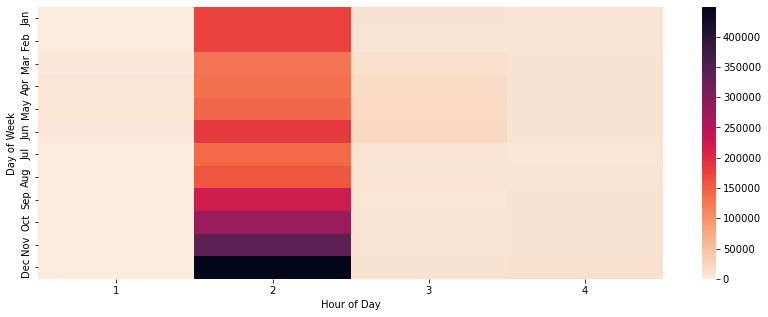

In [6]:
fig,ax1 = plt.subplots(figsize=(14,5))
sb.heatmap(no_of_accidents, cmap='rocket_r',ax=ax1);
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

In [15]:
data = pd.DataFrame({'Year':start_year,'Severity':accidents_clean['Severity'],'ID':accidents_clean['ID']})
year_severity = data.groupby(['Year','Severity']).count()
year_severity.unstack()

ID                             
Severity        1          2        3        4
Year                                          
2016          NaN    86758.0  21468.0  13798.0
2017          NaN   110365.0  30389.0  23164.0
2018          NaN   108568.0  30173.0  24435.0
2019          NaN   204759.0  30269.0  23587.0
2020      26053.0   534828.0  42806.0  22177.0
2021          NaN  1487713.0      NaN  24032.0

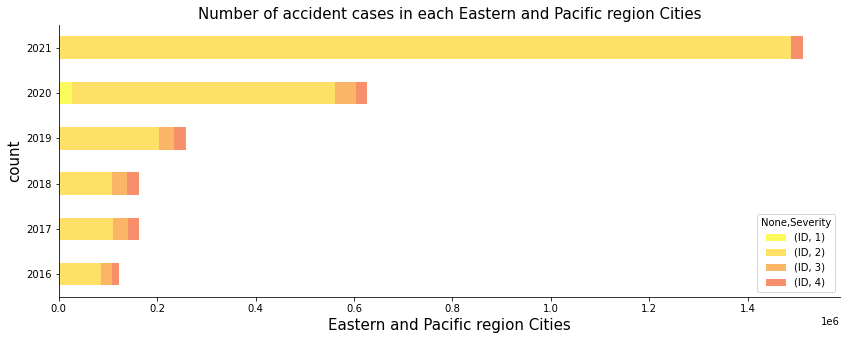

In [19]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
year_severity.unstack().plot(kind='barh',stacked=True,color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'],ax=ax)
plt.xlabel('Eastern and Pacific region Cities',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Number of accident cases in each Eastern and Pacific region Cities',fontsize=15);

### Region-Severity Analysis

In [24]:
state_cities = accidents_clean[['State','City','Severity','ID']].groupby(['State','City','Severity']).count().sort_values(by='State', ascending=False).reset_index()
CA_cities = state_cities[(state_cities['State'] == 'CA') & (state_cities['Severity'] == 4)].sort_values(by='ID', ascending=False)
CA_cities['cases'] = ((CA_cities['ID']/sum(CA_cities['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
CA_cities = CA_cities[:10]
CA_cities

,State,City,Severity,ID,cases
31142,CA,Los Angeles,4,726,7.95%
32272,CA,San Diego,4,293,3.21%
32331,CA,Sacramento,4,253,2.77%
31114,CA,Long Beach,4,168,1.84%
32292,CA,San Jose,4,146,1.60%
32308,CA,San Bernardino,4,141,1.54%
32924,CA,Oakland,4,125,1.37%
31645,CA,Bakersfield,4,121,1.32%
32307,CA,San Francisco,4,110,1.20%
31134,CA,Los Gatos,4,98,1.07%


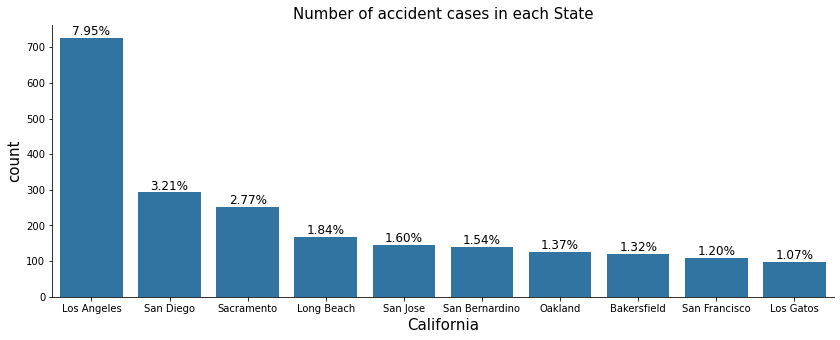

In [25]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot = sb.barplot(data = CA_cities,y='ID',x='City',color=sb.color_palette()[0])
plt.bar_label(splot.containers[0],labels=CA_cities['cases'],fontsize=12);
plt.xlabel('California',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Number of accident cases in each State',fontsize=15);

In [27]:
cities_streets = accidents_clean[['City','Street','Severity','ID']].groupby(['City','Street','Severity']).count().sort_values(by='City', ascending=False).reset_index()
LA_street = cities_streets[(cities_streets['City'] == 'Los Angeles') & (cities_streets['Severity'] == 4)].sort_values(by='ID', ascending=False)
LA_street['cases'] = ((LA_street['ID']/sum(LA_street['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
LA_street = LA_street[:10]
LA_street

,City,Street,Severity,ID,cases
168625,Los Angeles,I-10 W,4,50,6.89%
168622,Los Angeles,I-10 E,4,45,6.20%
168677,Los Angeles,I-5 N,4,40,5.51%
168563,Los Angeles,Golden State Fwy S,4,28,3.86%
168569,Los Angeles,Harbor Fwy N,4,26,3.58%
169220,Los Angeles,CA-110 N,4,25,3.44%
168755,Los Angeles,Whittier Blvd,4,22,3.03%
168668,Los Angeles,I-110 S,4,20,2.75%
168659,Los Angeles,I-105 E,4,16,2.20%
168884,Los Angeles,US-101 N,4,13,1.79%


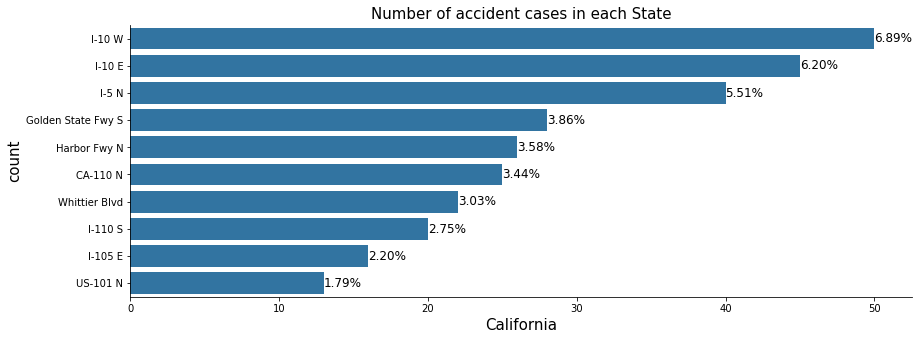

In [29]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot = sb.barplot(data = LA_street,x='ID',y='Street',color=sb.color_palette()[0])
plt.bar_label(splot.containers[0],labels=LA_street['cases'],fontsize=12);
plt.xlabel('Street',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Number of accident cases in each State',fontsize=15);

In [46]:
Timezone = accidents_clean[['Timezone','Severity','ID']].groupby(['Timezone','Severity']).count()
Timezone = Timezone.unstack().sort_values([('ID',2)])
Timezone

ID                       
Severity        1        2      3      4
Timezone                                
US/Mountain  7854   133213  12748  10782
US/Central   2672   409347  54331  21715
US/Pacific   7191   915343  27548  17012
US/Eastern   8313  1071712  60358  81544

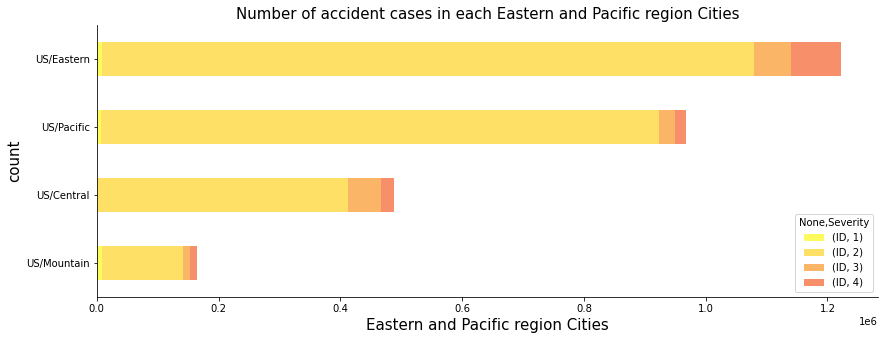

In [47]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
Timezone.plot(kind='barh',stacked=True,color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'],ax=ax)
plt.xlabel('Eastern and Pacific region Cities',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Number of accident cases in each Eastern and Pacific region Cities',fontsize=15);

In [50]:
timezone_cities = accidents_clean[['Timezone','City','ID']].groupby(['Timezone','City']).count().sort_values(by='Timezone', ascending=False).reset_index()
Eastern_cities = timezone_cities[(timezone_cities['Timezone'] == 'US/Eastern')].sort_values(by='ID', ascending=False)
Eastern_cities['cases'] = ((Eastern_cities['ID']/sum(Eastern_cities['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
Eastern_cities = Eastern_cities[:10]
Eastern_cities

,Timezone,City,ID,cases
4815,US/Eastern,Miami,106903,8.75%
4138,US/Eastern,Orlando,54690,4.48%
7007,US/Eastern,Charlotte,33141,2.71%
6383,US/Eastern,Raleigh,22837,1.87%
7627,US/Eastern,Atlanta,15619,1.28%
4467,US/Eastern,Jacksonville,14519,1.19%
6340,US/Eastern,Richmond,12149,0.99%
5457,US/Eastern,Tampa,10984,0.90%
8858,US/Eastern,Hialeah,10398,0.85%
9416,US/Eastern,Fort Lauderdale,10345,0.85%


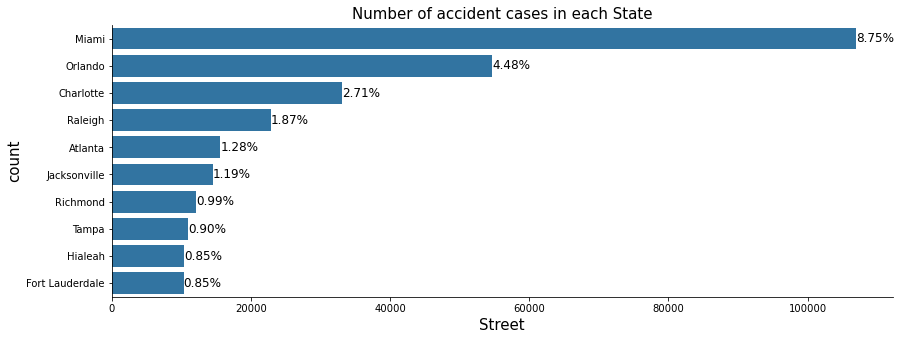

In [51]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False) # removing the top spine of the border
ax.spines['right'].set_visible(False) # removing the right spine of the border
splot = sb.barplot(data = Eastern_cities,x='ID',y='City',color=sb.color_palette()[0])
plt.bar_label(splot.containers[0],labels=Eastern_cities['cases'],fontsize=12);
plt.xlabel('Street',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Number of accident cases in each State',fontsize=15);

In [62]:
Weather_Condition = accidents_clean[['Weather_Condition','ID']].groupby(['Weather_Condition']).count().sort_values(by='ID', ascending=False).reset_index()
Weather_Condition['cases'] = ((Weather_Condition['ID']/len(accidents_clean['ID']))*100).apply(lambda x: '{0:.2f}%'.format(x))
Weather_Condition = Weather_Condition[:10]
Weather_Condition

,Weather_Condition,ID,cases
0,Fair,1107194,38.91%
1,Mostly Cloudy,363959,12.79%
2,Cloudy,348767,12.26%
3,Partly Cloudy,249939,8.78%
4,Clear,173823,6.11%
5,Light Rain,128403,4.51%
6,Overcast,84882,2.98%
7,Scattered Clouds,45132,1.59%
8,Light Snow,43752,1.54%
9,Fog,41226,1.45%


### Weather-Severity Analysis

In [66]:
weather_conditions = accidents_clean[['Weather_Condition','Severity','ID']].groupby(['Weather_Condition','Severity']).size()
weather_conditions = weather_conditions.reset_index(name='count').sort_values('count',ascending=False)
weather_conditions = weather_conditions[(weather_conditions['Weather_Condition'] == 'Fair') | (weather_conditions['Weather_Condition'] == 'Mostly Cloudy') | (weather_conditions['Weather_Condition'] == 'Cloudy') | (weather_conditions['Weather_Condition'] == 'Partly Cloudy') | (weather_conditions['Weather_Condition'] == 'Clear') | (weather_conditions['Weather_Condition'] == 'Light Rain') | (weather_conditions['Weather_Condition'] == 'Overcast') | (weather_conditions['Weather_Condition'] == 'Scattered Clouds') | (weather_conditions['Weather_Condition'] == 'Light Snow') | (weather_conditions['Weather_Condition'] == 'Fog')]
weather_conditions = weather_conditions.pivot(index='Severity', columns='Weather_Condition', values='count')
weather_conditions

Weather_Condition,Clear,Cloudy,Fair,Fog,Light Rain,Light Snow,Mostly Cloudy,Overcast,Partly Cloudy,Scattered Clouds
Severity,,,,,,,,,,
1,NaN,3231.0,12726.0,179.0,1297.0,56.0,4425.0,NaN,2487.0,NaN
2,118638.0,323213.0,1043277.0,38575.0,112504.0,38044.0,319525.0,55514.0,221358.0,30780.0
3,29924.0,11051.0,23426.0,940.0,8573.0,2637.0,24321.0,16150.0,15930.0,8709.0
4,25261.0,11272.0,27765.0,1532.0,6029.0,3015.0,15688.0,13218.0,10164.0,5643.0


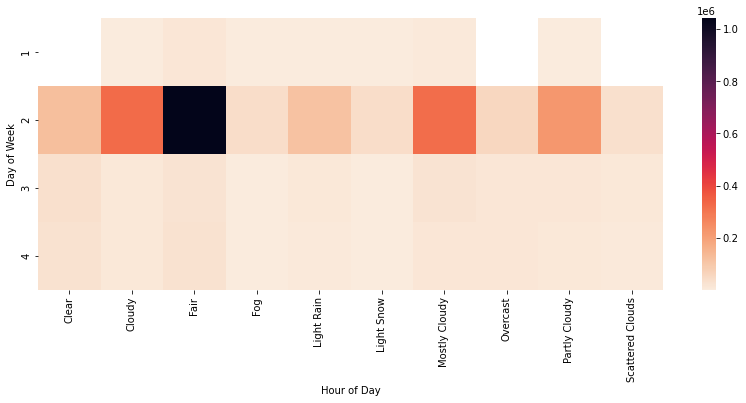

In [67]:
fig,ax1 = plt.subplots(figsize=(14,5))
sb.heatmap(weather_conditions, cmap='rocket_r',ax=ax1);
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

C:\Users\HP.PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


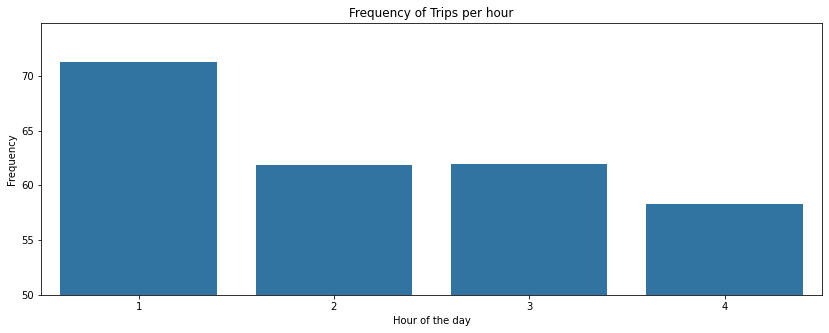

In [81]:
data = accidents_clean[['Severity','Temperature(F)']].groupby(['Severity']).mean()
plt.figure(figsize=(14,5))
sb.barplot(data.index,data['Temperature(F)'],color=sb.color_palette()[0])
plt.ylim(50)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Frequency of Trips per hour');

In [71]:
weather_conditions = accidents_clean
weather_conditions['Temp_range'] = pd.cut(x=weather_conditions['Temperature(F)'], 
                                          bins=[-89, -59, -29, 1, 31, 61, 91, 121, 151, 196],
                    labels=['(-89 to -59)', '(-59 to -29)', '(-29 to 1)', '(1 to 31)', 
                            '(31 to 61)', '(61 to 91)', '(91 to 121)', '(121 to 151)', '(151 to 196)'])
weather_conditions = weather_conditions[['Weather_Condition','Temp_range','ID']].groupby(['Weather_Condition',
                                                                                              'Temp_range']).size()
weather_conditions = weather_conditions.reset_index(name='count').sort_values('count',ascending=False)
weather_conditions = weather_conditions[(weather_conditions['Weather_Condition'] == 'Fair') | (weather_conditions['Weather_Condition'] == 'Mostly Cloudy') | (weather_conditions['Weather_Condition'] == 'Cloudy') | (weather_conditions['Weather_Condition'] == 'Partly Cloudy') | (weather_conditions['Weather_Condition'] == 'Clear') | (weather_conditions['Weather_Condition'] == 'Light Rain') | (weather_conditions['Weather_Condition'] == 'Overcast') | (weather_conditions['Weather_Condition'] == 'Scattered Clouds') | (weather_conditions['Weather_Condition'] == 'Light Snow') | (weather_conditions['Weather_Condition'] == 'Fog')]
weather_conditions = weather_conditions.pivot(index='Temp_range', columns='Weather_Condition', values='count')
weather_conditions

Weather_Condition,Clear,Cloudy,Fair,Fog,Light Rain,Light Snow,Mostly Cloudy,Overcast,Partly Cloudy,Scattered Clouds
Temp_range,,,,,,,,,,
(-89 to -59),0,0,0,0,0,0,0,0,0,0
(-59 to -29),0,0,5,0,0,0,1,0,1,0
(-29 to 1),795,592,4790,29,0,747,365,136,441,95
(1 to 31),12448,29888,43186,2972,136,33268,11540,9609,8239,2104
(31 to 61),59774,187799,400290,31129,80936,9576,117286,48225,68373,11904
(61 to 91),93525,129015,614931,6871,46851,15,226265,26546,160689,28318
(91 to 121),6559,208,38871,0,88,0,7485,98,11216,2500
(121 to 151),1,0,1,0,0,0,0,0,0,1
(151 to 196),1,0,4,0,0,0,0,0,0,1


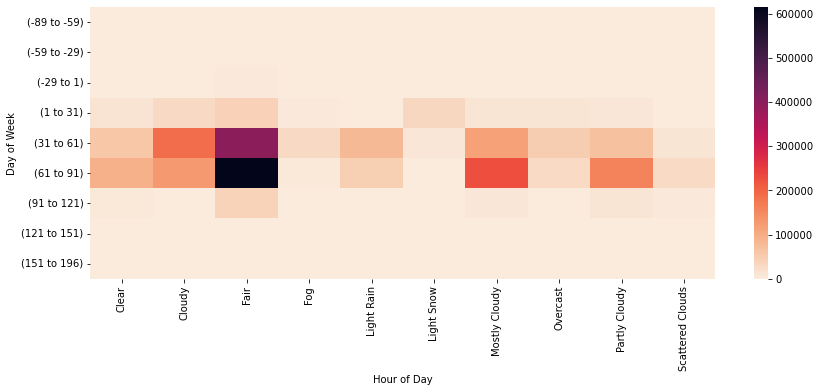

In [72]:
fig,ax1 = plt.subplots(figsize=(14,5))
sb.heatmap(weather_conditions, cmap='rocket_r',ax=ax1);
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

In [92]:
weather_conditions = accidents_clean
weather_conditions['Temp_range'] = pd.cut(x=weather_conditions['Temperature(F)'], 
                                          bins=[-89, -59, -29, 1, 31, 61, 91, 121, 151, 196],
                    labels=['(-89 to -59)', '(-59 to -29)', '(-29 to 1)', '(1 to 31)', 
                            '(31 to 61)', '(61 to 91)', '(91 to 121)', '(121 to 151)', '(151 to 196)'])
weather_conditions = weather_conditions[['Weather_Condition','Temp_range','Severity']].groupby(['Weather_Condition',
                                                                                              'Temp_range']).mean()
weather_conditions = weather_conditions.reset_index().sort_values('Severity',ascending=False)
weather_conditions = weather_conditions[(weather_conditions['Weather_Condition'] == 'Fair') | (weather_conditions['Weather_Condition'] == 'Mostly Cloudy') | (weather_conditions['Weather_Condition'] == 'Cloudy') | (weather_conditions['Weather_Condition'] == 'Partly Cloudy') | (weather_conditions['Weather_Condition'] == 'Clear') | (weather_conditions['Weather_Condition'] == 'Light Rain') | (weather_conditions['Weather_Condition'] == 'Overcast') | (weather_conditions['Weather_Condition'] == 'Scattered Clouds') | (weather_conditions['Weather_Condition'] == 'Light Snow') | (weather_conditions['Weather_Condition'] == 'Fog')]
weather_conditions = weather_conditions.pivot(index='Temp_range', columns='Weather_Condition', values='Severity').fillna(0)
weather_conditions

Weather_Condition,Clear,Cloudy,Fair,Fog,Light Rain,Light Snow,Mostly Cloudy,Overcast,Partly Cloudy,Scattered Clouds
Temp_range,,,,,,,,,,
(-89 to -59),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(-59 to -29),0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,0.000000
(-29 to 1),2.511950,2.023649,2.022756,2.068966,0.000000,2.124498,2.142466,2.595588,2.242630,2.568421
(1 to 31),2.580254,2.079564,2.098064,2.083782,2.044118,2.197457,2.238995,2.590488,2.237650,2.582224
(31 to 61),2.514454,2.089282,2.061653,2.083588,2.152800,2.202694,2.144135,2.503639,2.134015,2.450101
(61 to 91),2.421053,2.085835,2.059293,2.138553,2.146870,2.266667,2.135558,2.464288,2.130320,2.433011
(91 to 121),2.357372,2.043269,2.010882,0.000000,2.113636,0.000000,2.096192,2.346939,2.130350,2.410000
(121 to 151),3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
(151 to 196),2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


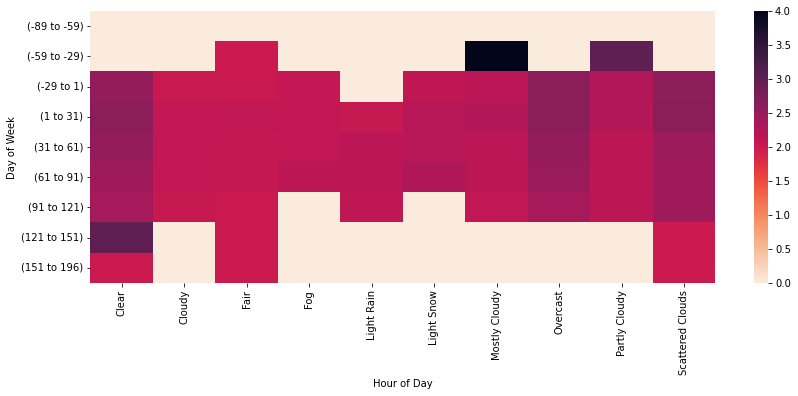

In [76]:
fig,ax1 = plt.subplots(figsize=(14,5))
sb.heatmap(weather_conditions, cmap='rocket_r',ax=ax1);
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

C:\Users\HP.PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


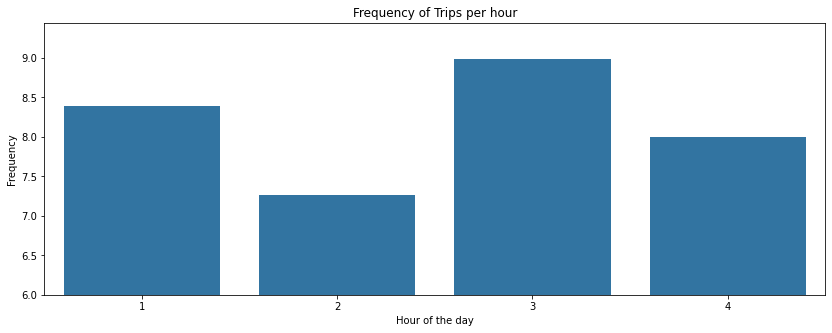

In [117]:
data = accidents_clean[['Severity','Wind_Speed(mph)']].groupby(['Severity']).mean()
plt.figure(figsize=(14,5))
sb.barplot(data.index,data['Wind_Speed(mph)'],color=sb.color_palette()[0])
plt.ylim(6)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Frequency of Trips per hour');

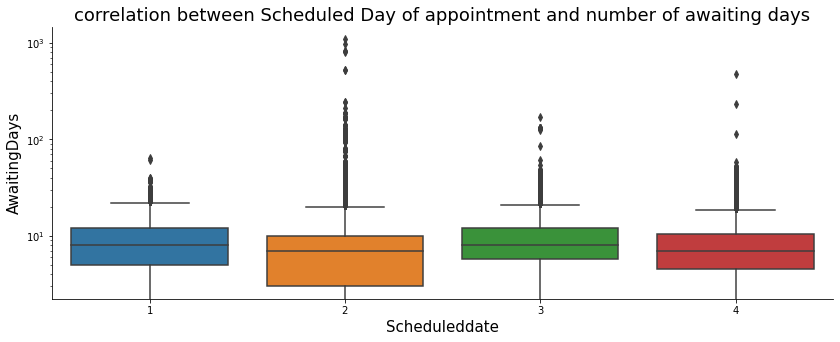

In [105]:
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sb.boxplot(data=accidents_clean,x= 'Severity',y='Wind_Speed(mph)')
plt.yscale('log')
plt.xlabel('Scheduleddate',fontsize=15)
plt.ylabel('AwaitingDays',fontsize=15)
plt.title('correlation between Scheduled Day of appointment and number of awaiting days',fontsize=18);

### Damage-Severity Analysis

C:\Users\HP.PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


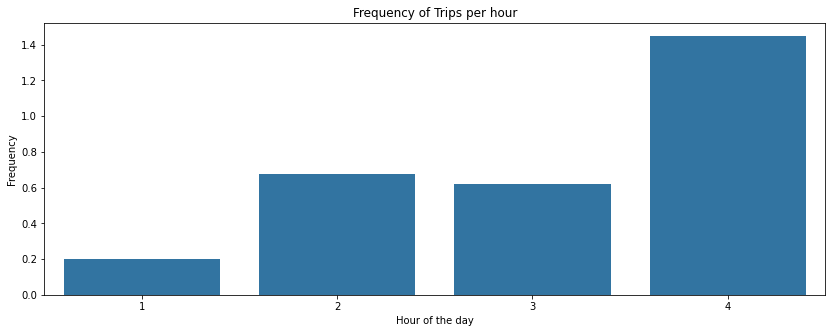

In [49]:
data = accidents_clean[['Severity','Distance(mi)']].groupby(['Severity']).mean()
plt.figure(figsize=(14,5))
sb.barplot(data.index,data['Distance(mi)'],color=sb.color_palette()[0])
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Frequency of Trips per hour');

In [50]:
accidents_clean.sample(6).T

,924653,77108,1481998,234800,2422989,1280753
ID,A-924654,A-77109,A-1481999,A-234801,A-2422990,A-1280754
Severity,2,2,2,2,2,2
Start_Time,2021-04-21 23:44:00,2016-09-01 15:57:53,2021-03-04 05:03:30,2021-09-15 15:20:00,2019-10-18 02:05:00,2021-10-28 09:30:00
End_Time,2021-04-22 01:22:30,2016-09-01 21:57:53,2021-03-04 11:32:07,2021-09-15 17:31:12,2019-10-18 03:17:30,2021-10-28 11:09:56
Start_Lat,32.599707,40.07133,25.890133,32.814362,32.648027,32.580884
Start_Lng,-117.089527,-74.95785,-80.189326,-117.114897,-117.060937,-93.800303
End_Lat,32.594377,40.04381,25.890274,32.799844,32.648027,32.580398
End_Lng,-117.088837,-75.00289,-80.186465,-117.112689,-117.060937,-93.800478
Distance(mi),0.37,3.048,0.178,1.011,0.0,0.035
Description,Incident on I-5 SB near MAIN Expect delays.,Between PA-63/Woodhaven Rd/Exit 35 and Academy...,Stationary traffic on FL-922 from Griffing Blv...,Accident on CA-274/Tierrasanta Blvd/Balboa Ave...,At Bonita Rd/Exit 7C - Accident.,Incident on PINE HILL RD near N MARKET ST Expe...
